<a href="https://colab.research.google.com/github/ThaiNguyenLongHai/Hai/blob/main/ProjectCuoiKi_ThaiNguyenLongHai_PredictAge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib. pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow. keras.preprocessing import image
from tensorflow.keras import layers
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Flatten
from tensorflow.keras.optimizers import RMSprop 
from keras.models import Sequential
from sklearn.metrics import accuracy_score #Do Luong
from keras.callbacks import EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
image_generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)

train_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/Dataset_Hai_2023/training",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "training",
                                                    class_mode ='categorical')
validation_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                    directory ="/content/drive/MyDrive/Dataset_Hai_2023/validation",
                                                    shuffle = True,
                                                    target_size = (150,150),
                                                    subset = "validation",
                                                    class_mode ='categorical')
train_dataset.class_indices

Found 19122 images belonging to 12 classes.
Found 2378 images belonging to 12 classes.


{'12-17 age': 0,
 '18-22 age': 1,
 '23-27 age': 2,
 '28-32 age': 3,
 '33-37 age': 4,
 '38-42 age': 5,
 '43-47 age': 6,
 '48-52 age': 7,
 '53-57 age': 8,
 '58-65 age': 9,
 '65_Over age': 10,
 'Under 12 age': 11}

In [ ]:
model = Sequential()

#Group 01
model.add(Conv2D(32,(3,3), padding = 'same', kernel_initializer = 'he_normal', input_shape =(150,150,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))

# Group 2
model.add(Conv2D(64,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))

# Group 3
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))

# Group 4
model.add(Conv2D(256,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3), padding = 'same', kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(2,2)))
model.add(Dropout(0.2))




In [ ]:
model.add(Flatten())
# Group 5
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Group 6
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Group 7
model.add(Dense(12,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 activation (Activation)     (None, 150, 150, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        1

In [6]:
model.compile(loss ='mse', optimizer = RMSprop(), metrics = ['accuracy'])
history = model.fit(train_dataset ,batch_size=128, epochs=50,validation_data = validation_dataset)

Epoch 1/50
598/598 [==============================] - 9288s 16s/step - loss: 0.0811 - accuracy: 0.1893 - val_loss: 0.0677 - val_accuracy: 0.2969
Epoch 2/50
598/598 [==============================] - 76s 127ms/step - loss: 0.0689 - accuracy: 0.3069 - val_loss: 0.0623 - val_accuracy: 0.3246
Epoch 3/50
598/598 [==============================] - 78s 130ms/step - loss: 0.0640 - accuracy: 0.3530 - val_loss: 0.0634 - val_accuracy: 0.3541
Epoch 4/50
598/598 [==============================] - 78s 130ms/step - loss: 0.0618 - accuracy: 0.3800 - val_loss: 0.0640 - val_accuracy: 0.2733
Epoch 5/50
598/598 [==============================] - 78s 130ms/step - loss: 0.0604 - accuracy: 0.3966 - val_loss: 0.0628 - val_accuracy: 0.3654
Epoch 6/50
598/598 [==============================] - 79s 131ms/step - loss: 0.0597 - accuracy: 0.4038 - val_loss: 0.0620 - val_accuracy: 0.3638
Epoch 7/50
598/598 [==============================] - 78s 131ms/step - loss: 0.0588 - accuracy: 0.4143 - val_loss: 0.0600 - val_ac

In [7]:
score = model.evaluate(train_dataset, verbose = 0)
print('Sai So Kiem Tra:', score[0])
print('Do Chinh Xac Kiem Tra:', score[1])


Sai So Kiem Tra: 0.016367651522159576
Do Chinh Xac Kiem Tra: 0.8521075248718262


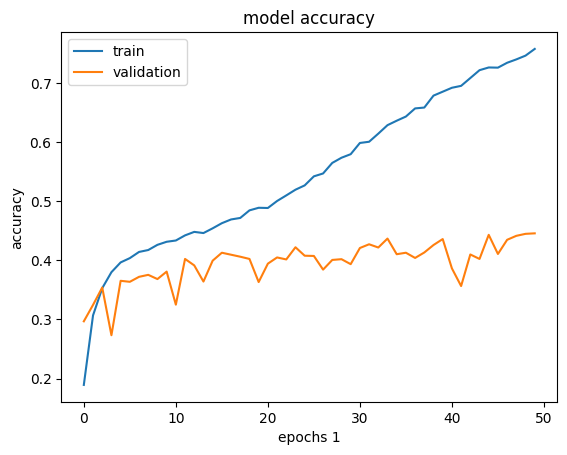

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs 1')
plt.legend(['train','validation'])
plt.show()


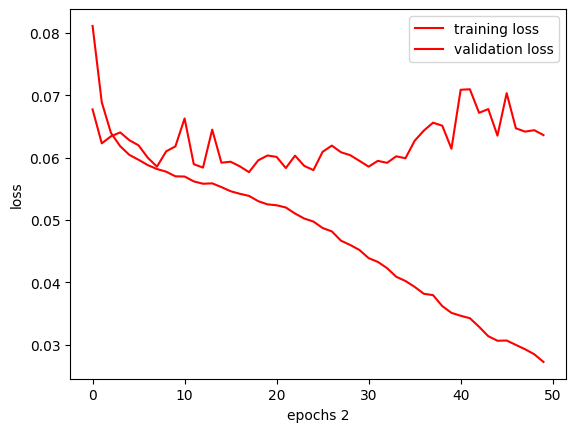

In [9]:
plt.plot(history.history['loss'], 'r', label ='training loss')
plt.plot(history.history['val_loss'], 'r', label ='validation loss')
plt.xlabel('epochs 2')
plt.ylabel('loss')
plt.legend()
plt.show()


In [10]:
model.save('Age_Predict_People.h5')

1/1 [==============================] - 0s 225ms/step


array(['23-27 age'], dtype='<U12')

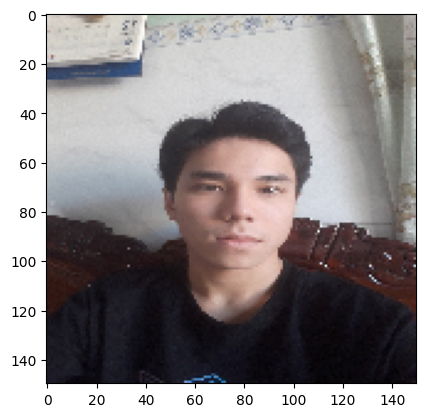

In [13]:
model_CNN = load_model('Age_Predict_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Anh/Duc.jpg"
predict = ['12-17 age','18-22 age','23-27 age','28-32 age','33-37 age','38-42 age','43-47 age','48-52 age','53-57 age','58-65 age','65_Over age','Under 12 age']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]

1/1 [==============================] - 0s 217ms/step


array(['18-22 age'], dtype='<U12')

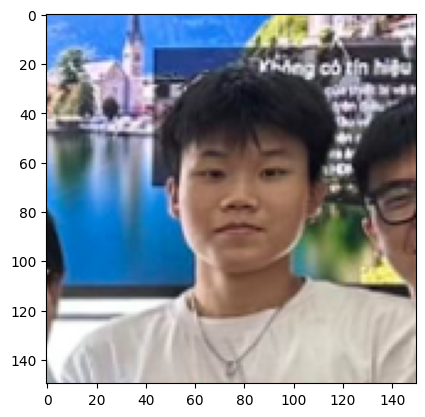

In [14]:
model_CNN = load_model('Age_Predict_People.h5')
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

filename = "/content/drive/MyDrive/Anh/Hieu.jpg"
predict = ['12-17 age','18-22 age','23-27 age','28-32 age','33-37 age','38-42 age','43-47 age','48-52 age','53-57 age','58-65 age','65_Over age','Under 12 age']
predict = np.array(predict)
img = load_img(filename, target_size =(150,150))
plt.imshow(img)

img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img = img/255


result = np.argmax(model_CNN.predict(img), axis = -1)
predict[result]